In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
from pandas import DataFrame
from datetime import date
from matplotlib import style
from pandas import to_datetime
import matplotlib.pylab as plt
import math
from matplotlib.pylab import rcParams

%matplotlib inline

In [3]:
data = pd.read_csv("Electric_Production.csv")
data

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [4]:
data.rename(columns = {'DATE' : 'date', 'Value' : 'value'}, inplace=True)
data

,date,value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [5]:
data['date'] = pd.to_datetime(data['date'])
data

,date,value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [6]:
data.set_index('date', inplace=True)
data.head()

,value
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


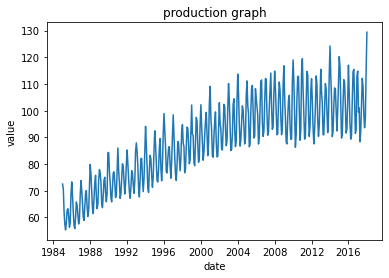

In [7]:
plt.xlabel("date")
plt.ylabel("value")
plt.title("production graph")
rcParams['figure.figsize'] = 10,6
plt.plot(data);

In [8]:
rolmean = data.rolling(window=12).mean()
print(rolmean.head(20))

                value
date                 
1985-01-01        NaN
1985-02-01        NaN
1985-03-01        NaN
1985-04-01        NaN
1985-05-01        NaN
1985-06-01        NaN
1985-07-01        NaN
1985-08-01        NaN
1985-09-01        NaN
1985-10-01        NaN
1985-11-01        NaN
1985-12-01  62.165667
1986-01-01  62.232375
1986-02-01  62.008617
1986-03-01  61.989608
1986-04-01  61.953067
1986-05-01  61.994617
1986-06-01  62.145458
1986-07-01  62.407567
1986-08-01  62.510325


In [9]:
std = data.rolling(window=12).std()
print(std.head(20))

               value
date                
1985-01-01       NaN
1985-02-01       NaN
1985-03-01       NaN
1985-04-01       NaN
1985-05-01       NaN
1985-06-01       NaN
1985-07-01       NaN
1985-08-01       NaN
1985-09-01       NaN
1985-10-01       NaN
1985-11-01       NaN
1985-12-01  5.746613
1986-01-01  5.880632
1986-02-01  5.573367
1986-03-01  5.572113
1986-04-01  5.605773
1986-05-01  5.553706
1986-06-01  5.461847
1986-07-01  5.561265
1986-08-01  5.589537


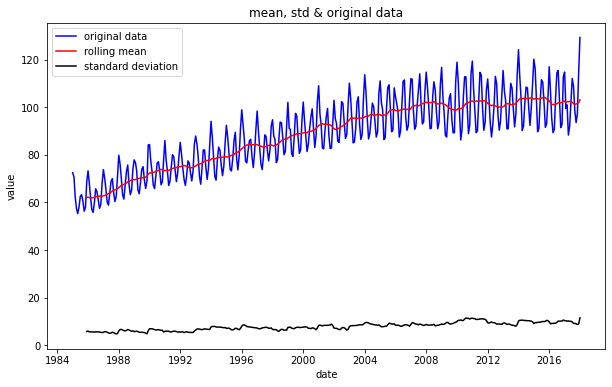

In [10]:
# plot rolling statistics

original_data = plt.plot(data, color='blue',label='original data')
mean = plt.plot(rolmean,color ='red',label='rolling mean')
std = plt.plot(std,color ='black',label='standard deviation')
plt.title("mean, std & original data")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.show(block =False)

In [11]:
# perform dickey fuller test (ADFT)

from statsmodels.tsa.stattools import adfuller 

adft = adfuller(data['value'],autolag='AIC')

# output for dft will give us without defining what the values are.
#hence we manually write what values does it explains using a for loop

output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)

Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


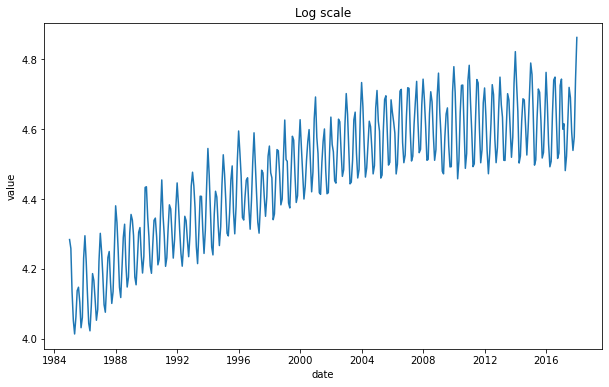

In [12]:
data_logscale = np.log(data)

# logarithmic function is used to scale the data to a certain extent.

plt.plot(data_logscale)
plt.title("Log scale")
plt.xlabel("date")
plt.ylabel("value")
#plt.legend()
rcParams['figure.figsize'] = 10,6
plt.show(block =False)

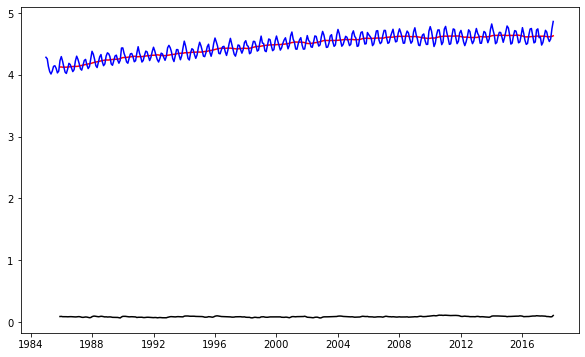

In [13]:
#determining the rolling mean(average) for the log data. Perform the same steps which are performed on the data before.

moving_average = data_logscale.rolling(window=12).mean()

#print(rolmean_log)
#determining the standard deviation ( same steps! )

std_dev = data_logscale.rolling(window=12).std()
#print(std_log)
plt.plot(moving_average, color='red')
plt.plot(data_logscale, color='blue')
plt.plot(std_dev, color='black');

In [14]:
movingavg_logscale = data_logscale - moving_average
movingavg_logscale.head(15)

,value
date,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN
1985-06-01,NaN
1985-07-01,NaN
1985-08-01,NaN
1985-09-01,NaN


In [15]:
movingavg_logscale.dropna(inplace=True)
movingavg_logscale.head(10)

,value
date,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
1986-05-01,-0.101472
1986-06-01,-0.033363
1986-07-01,0.055963
1986-08-01,0.034639


In [16]:
from statsmodels.tsa.stattools import adfuller 

def test_stationarity(timeseries):
    
    #determining the rolling statistics for timeseries
    
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plotting the rolling statistics for timeseries
    
    timeseries_original =plt.plot(timeseries, color='blue',label = 'original graph')
    timeseries_mean =plt.plot(movingAverage, color='red',label = 'movingAverage')
    timeseries_std =plt.plot(movingSTD, color='black',label = 'movingSTD')
    plt.legend(loc='best')
    plt.title("rolling mean & standard deviation of timeseries")
    plt.show(block=False)
    
    #perform dickey fuller test
    
    print("results of dickey fuller test")
    adft = adfuller(data['value'],autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

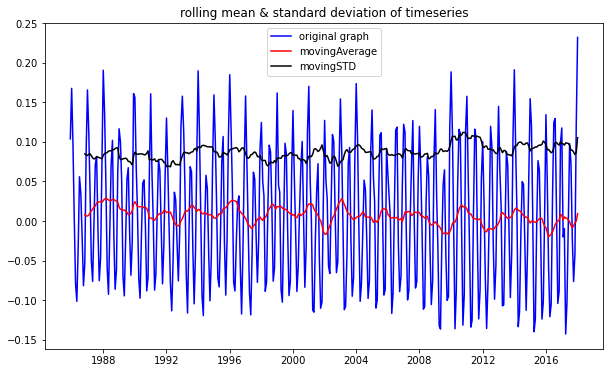

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [17]:
rcParams['figure.figsize'] = 10,6

# we are going to use the function here.

test_stationarity(movingavg_logscale)

In [18]:
print(data_logscale.head())

               value
date                
1985-01-01  4.283658
1985-02-01  4.258049
1985-03-01  4.134369
1985-04-01  4.051287
1985-05-01  4.013046


In [19]:
weighted_average = data_logscale.ewm(halflife=12, min_periods=0,adjust=True).mean()
print(weighted_average.head())

               value
date                
1985-01-01  4.283658
1985-02-01  4.270484
1985-03-01  4.222468
1985-04-01  4.175897
1985-05-01  4.139460


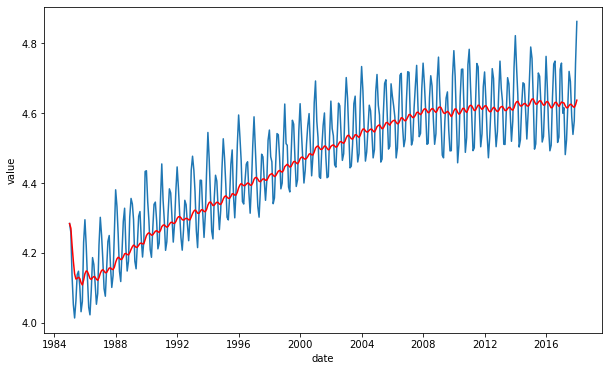

In [20]:
plt.plot(data_logscale)
plt.plot(weighted_average, color='red')
plt.xlabel("date")
plt.ylabel("value")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
#plt.legend()
plt.show(block =False)

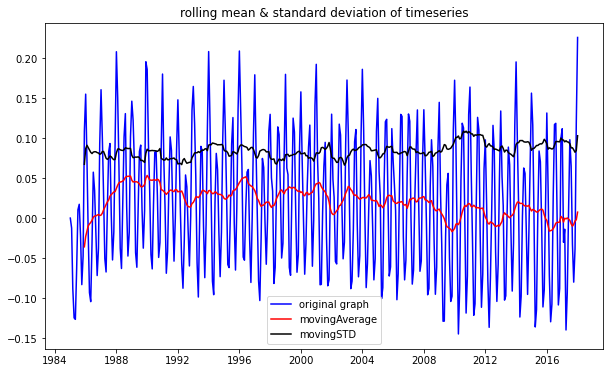

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [21]:
logScale_weightedMean = data_logscale-weighted_average

# use the same function defined above and pass the object into it.

rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

# ARIMA Model

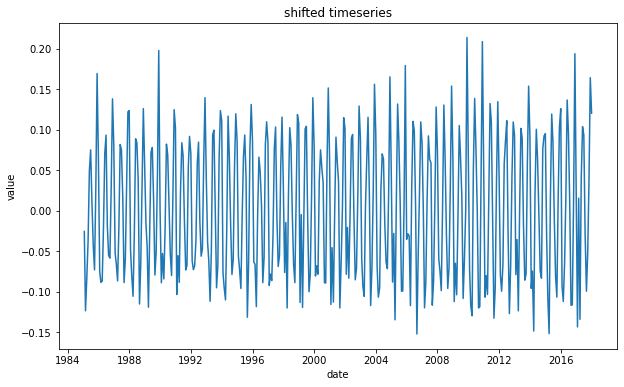

In [22]:
data_log_shift = data_logscale - data_logscale.shift()
plt.xlabel("date")
plt.ylabel("value")
plt.title("shifted timeseries")

rcParams['figure.figsize'] = 10,6
plt.plot(data_log_shift)

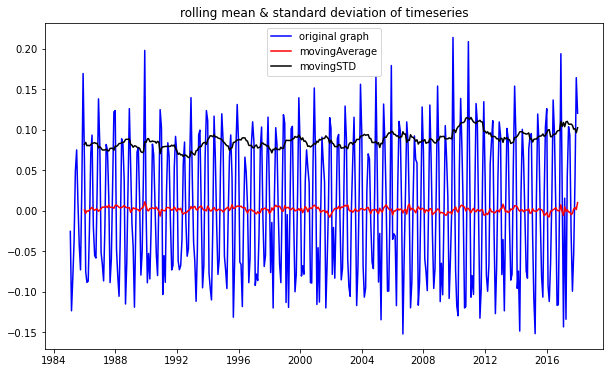

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [23]:
# We are dropping the NaN values, and the data_log_shift value here is 'd'

data_log_shift.dropna(inplace=True)

# using the same fuction call and plotting the graph.

rcParams['figure.figsize'] = 10,6
test_stationarity(data_log_shift)

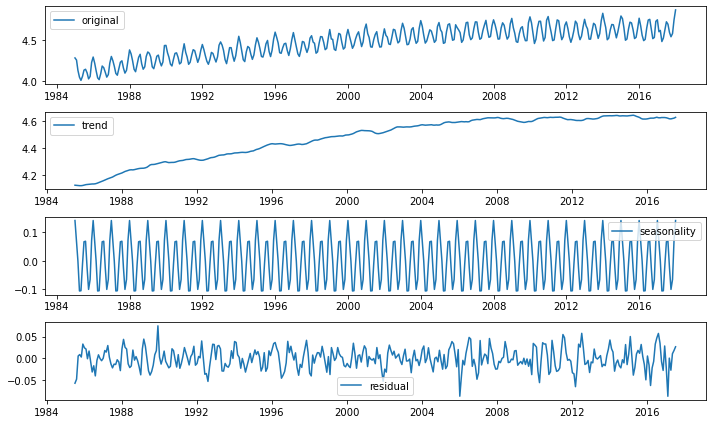

In [24]:
# next is to segregate the differentiated values to decompose, we use seasonal decompose method from stats model.

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

#decomposition = seasonal_decompose(data_logscale,model='additive', freq=12).plot()

# plotting the graphs induvidually
decomposition = seasonal_decompose(data_logscale,model='additive', period=12)
trend = decomposition.trend
seasonality =decomposition.seasonal
# ensure that the residual method is just " resid "
# check the values inside the subplots are 411,412,413,414 which mean, there are 4 graphs in total(1st number in the value)
residual =decomposition.resid
plt.subplot(411)
plt.plot(data_logscale,label= 'original')
plt.legend(loc='best')
plt.plot()
plt.subplot(412)
plt.plot(trend,label= 'trend')
plt.legend(loc='best')
plt.plot()
plt.subplot(413)
plt.plot(seasonality,label= 'seasonality')
plt.legend(loc='best')
plt.plot()
plt.subplot(414)
plt.plot(residual,label= 'residual')
plt.legend(loc='best')
plt.plot()
plt.tight_layout()

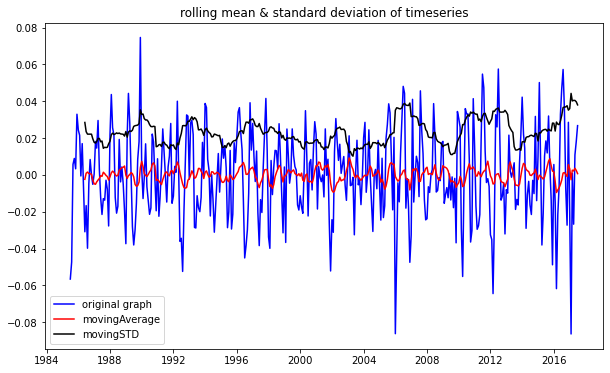

results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [25]:
decomposed_logdata = residual
decomposed_logdata.dropna(inplace=True)
test_stationarity(decomposed_logdata)

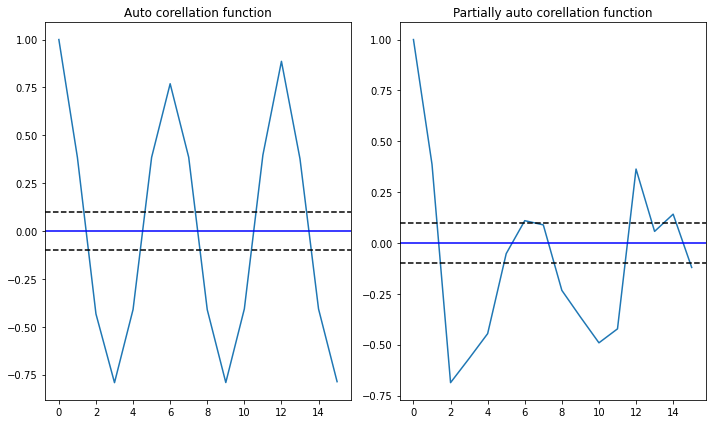

In [26]:
# plot acf  and pacf graphs ( auto corellation function and partially auto corellation function )
# to find 'p' from p,d,q we need to use, PACF graphs and for 'q' use ACF graph

from statsmodels.tsa.stattools import acf,pacf

# we use d value here(data_log_shift)

acf = acf(data_log_shift, nlags=15)
pacf= pacf(data_log_shift, nlags=15,method='ols')

# ols stands for ordinary least squares used to minimise the errors

# 121 and 122 makes the data to look side by size 

#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()


#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_shift)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

In [27]:
# in order to find the p and q values from the above graphs,
#  we need to check,where the graph cuts off the origin or drops to zero for the first time
# from the above graphs the p and q values are merely close to 2 where the graph cuts off the orgin ( draw the line to x axis)
# now we have p,d,q values. So now we can substitute in the ARIMA model and lets see the output.

C:\Users\xaris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xaris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


RSS : 1.273784


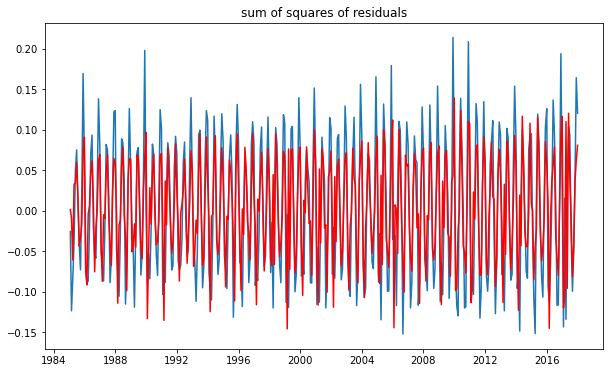

In [28]:
from statsmodels.tsa.arima_model import ARIMA

# calculating the AR model
model = ARIMA(data_logscale, order =(2,1,0))

# consider MA as 0 in MA_model
AR_result = model.fit()
plt.plot(data_log_shift)
plt.plot(AR_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((AR_result.fittedvalues-data_log_shift["value"])**2))

C:\Users\xaris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xaris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\xaris\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


RSS : 0.522661


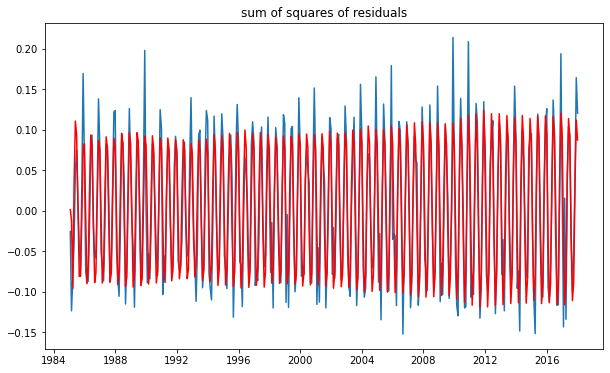

In [29]:
# calculating the ARIMA model

model = ARIMA(data_logscale, order =(3,1,3))
ARIMA_result = model.fit()
plt.plot(data_log_shift)
plt.plot(ARIMA_result.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((ARIMA_result.fittedvalues-data_log_shift["value"])**2))

In [30]:
# we founded the predicted values in the above code and we need to print the values in the form of series

ARIMA_predicts = pd.Series(ARIMA_result.fittedvalues,copy=True)
ARIMA_predicts.head()

date
1985-02-01    0.001368
1985-03-01   -0.012078
1985-04-01   -0.096142
1985-05-01    0.032645
1985-06-01    0.110736
dtype: float64

In [31]:
# finding the cummulative sum

ARIMA_predicts_cumsum = ARIMA_predicts.cumsum()
print(ARIMA_predicts_cumsum.head())

date
1985-02-01    0.001368
1985-03-01   -0.010711
1985-04-01   -0.106852
1985-05-01   -0.074207
1985-06-01    0.036529
dtype: float64


In [32]:
ARIMA_predicts_log = pd.Series(data_logscale['value'],index =data_logscale.index)
ARIMA_predicts_log = ARIMA_predicts_log.add(ARIMA_predicts_cumsum,fill_value=0)
print(ARIMA_predicts_log.head())

date
1985-01-01    4.283658
1985-02-01    4.259417
1985-03-01    4.123659
1985-04-01    3.944435
1985-05-01    3.938839
dtype: float64


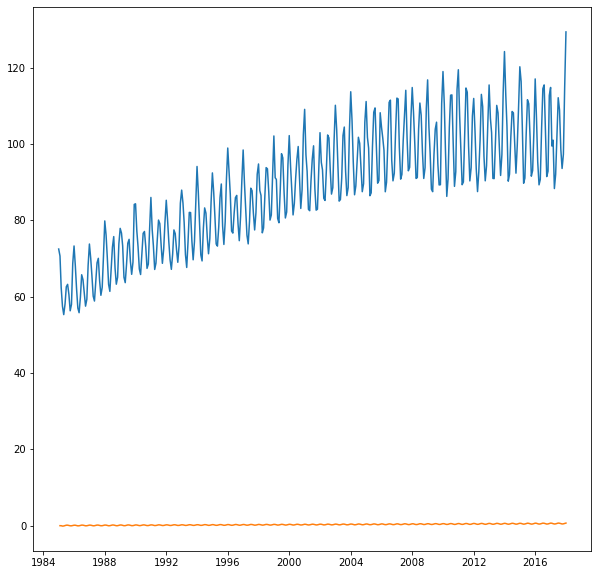

In [42]:
# converting back to the exponential form results in getting back to the original data.

ARIMA_final_preditcs = np.exp(ARIMA_predicts_log)
rcParams['figure.figsize']=10,10
plt.plot(data)
plt.plot(ARIMA_predicts_cumsum)

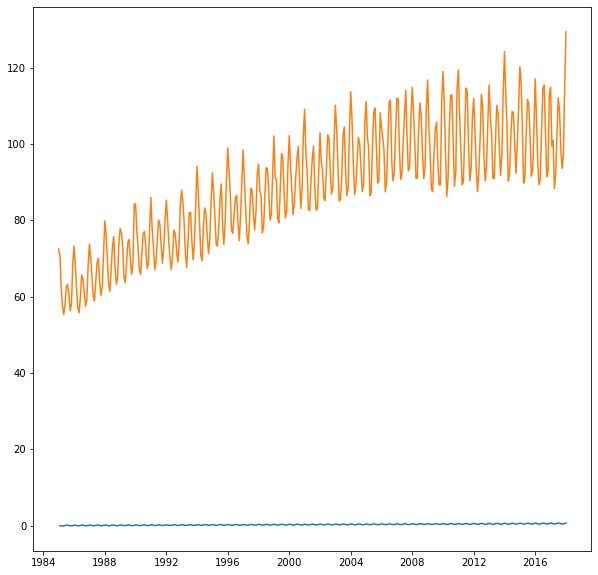

In [39]:
rcParams['figure.figsize']=10,10
plt.plot(ARIMA_predicts_cumsum)
plt.plot(data)

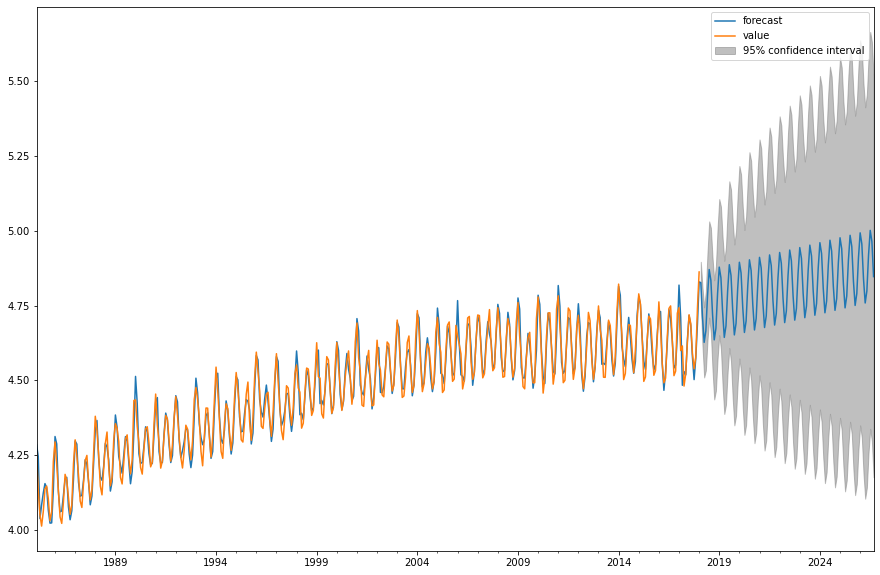

In [46]:
#future prediction

rcParams['figure.figsize']=15,10
ARIMA_result.plot_predict(1,500)
x=ARIMA_result.forecast(steps=200)

In [36]:
# check the predicted values for ARIMA_result.plot_predict(1,500)

ARIMA_result.forecast(steps=200)

(array([4.82710657, 4.71359008, 4.62750039, 4.66602468, 4.78248238,
        4.87103857, 4.8352898 , 4.72137068, 4.63580928, 4.67426179,
        4.79110371, 4.8791492 , 4.84345484, 4.72916892, 4.64410159,
        4.68251614, 4.79970834, 4.8872755 , 4.85160353, 4.736983  ,
        4.6523791 , 4.69078599, 4.80829796, 4.89541579, 4.85973753,
        4.74481128, 4.66064339, 4.69906977, 4.81687413, 4.90356855,
        4.86785831, 4.75265232, 4.66889591, 4.70736608, 4.82543821,
        4.91173243, 4.87596722, 4.76050481, 4.67713792, 4.71567366,
        4.83399143, 4.91990623, 4.88406543, 4.76836759, 4.68537058,
        4.72399138, 4.84253491, 4.92808885, 4.89215401, 4.7762396 ,
        4.69359492, 4.73231824, 4.85106963, 4.93627932, 4.90023393,
        4.78411992, 4.70181185, 4.74065333, 4.85959647, 4.94447677,
        4.90830604, 4.79200771, 4.71002221, 4.74899583, 4.86811625,
        4.95268042, 4.91637111, 4.7999022 , 4.71822673, 4.75734502,
        4.87662966, 4.96088955, 4.92442982, 4.80